In [96]:
import numpy as np
import matplotlib.pyplot as plt

## Thrust curve from graph
Graph and data points from http://www.nar.org/SandT/pdf/Estes/F15.pdf

![f15 curve](img/f15.png)

In [97]:
data = np.array([
    [0.000, 0.000],
    [0.148, 7.638],
    [0.228, 12.253],
    [0.294, 16.391],
    [0.353, 20.210],
    [0.382, 22.756],
    [0.419, 25.260],
    [0.421, 25.190],
    [0.431, 25.180],
    [0.444, 25.220],
    [0.458, 25.230],
    [0.462, 25.151],
    [0.477, 23.074],
    [0.520, 20.845],
    [0.593, 19.093],
    [0.688, 17.500],
    [0.855, 16.225],
    [1.037, 15.427],
    [1.205, 14.948],
    [1.423, 14.627],
    [1.452, 15.741],
    [1.503, 14.785],
    [1.736, 14.623],
    [1.955, 14.303],
    [2.210, 14.141],
    [2.494, 13.819],
    [2.763, 13.338],
    [3.120, 13.334],
    [3.382, 13.013],
    [3.404, 9.352],
    [3.418, 4.895],
    [3.450, 0.000]
])

time = data[:, 0]
thrust = data[:, 1]

In [98]:
# interpolate to fill in gaps
time_interpolated = np.linspace(time.min(), time.max(), num=500)
thrust_interpolated = np.interp(time_interpolated, time, thrust)

In [99]:
# add noise
noise = np.random.normal(0, 0.2, thrust_interpolated.shape)

# less noise from 0-1.5s
less_noise_indices = np.where(time_interpolated <= 1.5)[0]
thrust_noisy = thrust_interpolated.copy()
thrust_noisy[less_noise_indices] += noise[less_noise_indices]

# more noise after 1.5s
more_noise_indices = np.where(time_interpolated > 1.5)[0]
thrust_noisy[more_noise_indices] += 1.5 * noise[more_noise_indices]

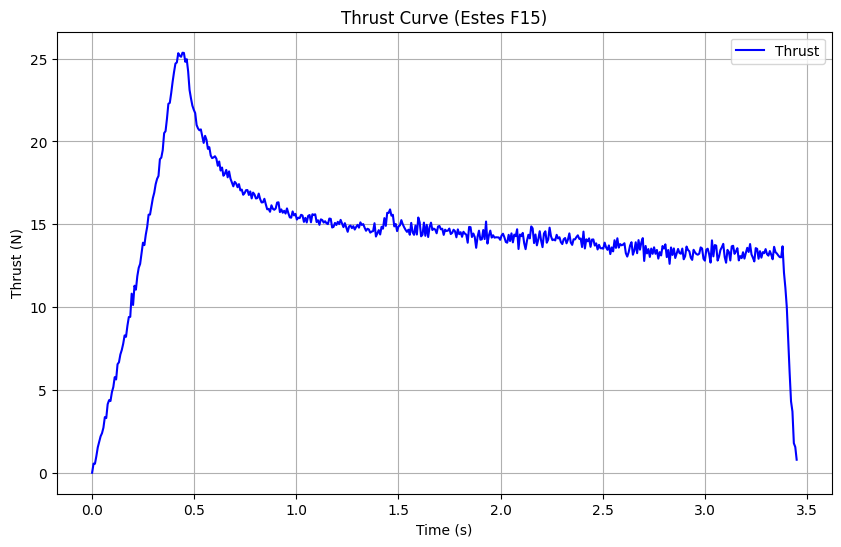

In [100]:
# plot thrust curve
plt.figure(figsize=(10, 6))
plt.plot(time_interpolated, thrust_noisy, label='Thrust', color='blue')
# plt.scatter(time, thrust, color='red')
plt.title('Thrust Curve (Estes F15)')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.legend()
plt.grid()
plt.show()

In [101]:
print(len(thrust_noisy))

500


In [102]:
# save thrust curve
with open('f15_thrust.npy', 'wb') as f:
    np.save(f, thrust_noisy)

In [103]:
# resample the thrust curve to match simulation length
total_simulation_time = 30 # s
num_simulation_steps = 3001
time_simulation = np.linspace(0, total_simulation_time, num_simulation_steps)

# create new thrust curve array
thrust_simulation = np.zeros(num_simulation_steps)

In [113]:
# map the thrust data to the duration of the thrust of the simulation
# get the proportion of the end time relative to the total simulation time and multiply it with the number of steps
end_time = time_interpolated.max()
num_thrust_steps = int(num_simulation_steps * (end_time / total_simulation_time))
time_thrust = np.linspace(0, end_time, num_thrust_steps)

# takes each value of time_thrust, find the corresponding interval in time_interpolated,
# then perform linear interpolation to calculate specific thrust value at that specific time
thrust_resampled = np.interp(time_thrust, time_interpolated, thrust_noisy) 

In [105]:
# insert resampled thrust data into simulation thrust curve
thrust_simulation[:num_thrust_steps] = thrust_resampled

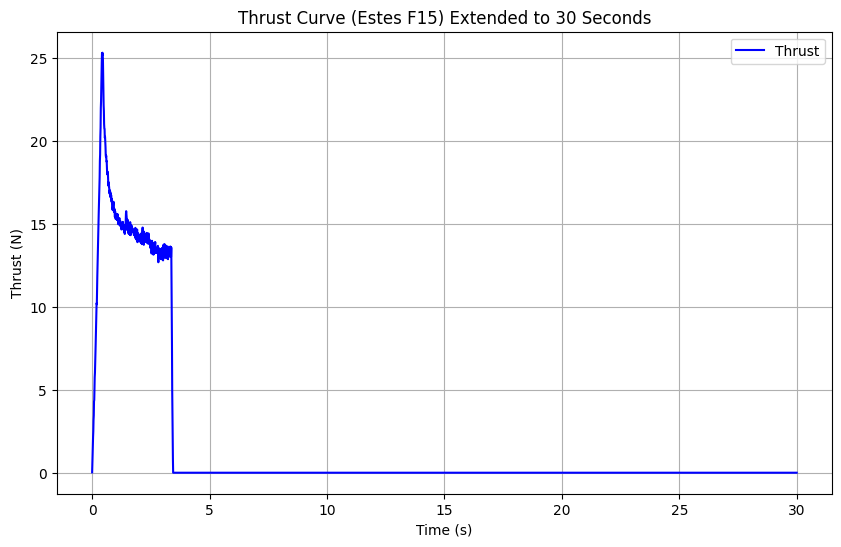

3001


In [107]:
plt.figure(figsize=(10, 6))
plt.plot(time_simulation, thrust_simulation, label='Thrust', color='blue')
plt.title('Thrust Curve (Estes F15) Extended to 30 Seconds')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.legend()
plt.grid()
plt.show()

print(len(thrust_simulation))

In [108]:
# save extended thrust curve
with open('f15_thrust_extended.npy', 'wb') as f:
    np.save(f, thrust_simulation)